**Анализ потенциально популярных продуктов в интеренет-магазине компьютерных игр планирование рекламных кампаний.**

#### Цель: 

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Шаг.1. Изучим информацию.**

In [1]:
# импортируем библеотку pandas и библиотки для построения графиков,  
# высокоуровневых математический функций, вычисления факториала 
# и для задания распределения по мат. ожиданию
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import factorial
from scipy import stats as st
import plotly
from chart_studio.plotly import plot, iplot
import cufflinks
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

# задействуем фичи, от ошибок при повторном использовании одного и того же df
# и для отображения трёх символов после запятой для всех значений с плавающей запятой
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# делаем загрузку с разных путей в зависимости от того, где запущена тетрадка - локально или на сервере ЯП
root_local = 'C:/Users/PC/проекты Яндекс/Датасеты/' #путь к данным при локальном запуске
root_yp = '/datasets/' #путь к данным при запуске на сервере ЯП
username = 'PC'
try:
    username = os.environ["USERNAME"]
except:
    pass
if(username == 'PC'): # локально
    root_path = root_local
else: # в тренажере
    root_path = root_yp
df = pd.read_csv(root_path + 'games.csv')

In [3]:
# считаем данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN


In [6]:
# просмотрим данные каждой колонки
list_column = [  
    [df, ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']]]
 
for data in list_column:
    for column in data[1]:
        
        print('\n\n\n', column, '\n')
        print(data[0][column].value_counts())




 Name 

Need for Speed: Most Wanted    12
Ratatouille                     9
Madden NFL 07                   9
FIFA 14                         9
LEGO Marvel Super Heroes        9
                               ..
F1 Racing Championship          1
Mario Paint                     1
Vampire Mansion: Linda Hyde     1
Housekeeping                    1
Twisted Metal                   1
Name: Name, Length: 11559, dtype: int64



 Platform 

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64



 Year_of_Release 

2008.000    1427
2009.000    1426
2010.000    1255
2007.000    1197
2011.000    1136
2006.000    1006
2005

In [7]:
# просмотрим данные каждой колонки
list_column = [  
    [df, ['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']]]
 
for data in list_column:
    for column in data[1]:
        
        print(column)
        print(data[0][column].isnull().sum())

Name
2
Platform
0
Year_of_Release
269
Genre
2
NA_sales
0
EU_sales
0
JP_sales
0
Other_sales
0
Critic_Score
8578
User_Score
6701
Rating
6766


Вывода:
1. Name - в двух случаях не хватает имени. Потери не страшные.
2. Platform - для 267 игр не указана платформа
3. Genre - здесь всё в порядке
4. NA_sales - для 4508 игр продажы нулевые
5. EU_sales - для 5870 игр продажы нулевые
6. JP_sales - для 10514 игр продажы нулевые
7. Other_sales - для 6601 игр продажы нулевые
8. Critic_Score - есть половина пропусков данных
Отстствие продаж можно заменить на нулевые. Возможно их просто не было или данные не качественно предоставленны. 
9. User_Score - есть много пропусков данных. tbd - это значит, to be de determined (пока еще не определено). Можно заменить на ноль.
10. Rating - ESRB отсуствует почти у половины. Похоже его можно заменить на нулевой.

**Шаг.2. Подготовка данных**

In [8]:
# приведем название столбцов к нижнему регистру
df.columns = map(str.lower, df.columns)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
# удалим пропущенные значения в name и genre. Их всего 2
df.dropna(subset = ['name', 'genre'], inplace = True)

In [11]:
# приоткроем природу пропусков year_of_release, через name
df[df['year_of_release'].isnull()]['name'].value_counts()

LEGO Harry Potter: Years 5-7    7
Rock Band                       4
Happy Feet Two                  4
Bejeweled 3                     3
Test Drive Unlimited 2          3
                               ..
Ferrari: The Race Experience    1
Tube Slider                     1
Madden NFL 11                   1
Major League Baseball 2K6       1
Legacy of Kain: Soul Reaver     1
Name: name, Length: 232, dtype: int64

In [12]:
# Похоже, данные по релизу не известны, для мало известных игр. 
# заменим год релиза на числовые значения. Все года должны быть целочисленные. 
def year_of_release(row):
 
    for i in range(1980, 2016):
        if (str(i) in row[0]) and (np.isnan(row[1])):
            return i
    return row[1]
df['year_of_release'] = df[['name', 'year_of_release']].apply(year_of_release, axis = 1)
# и проверим сколько удалось заполнить
df['year_of_release'].isnull().sum()

252

In [13]:
# остальные пропуски заполним удалим. Их мало и по ним мало, что можно спрогнозировать
df.dropna(subset = ['year_of_release'], inplace = True)

In [14]:
df['critic_score'].isnull().sum()

8466

In [15]:
# попробуем заполнить пропуски в critic_score
# получим табличку, где у нас хранятся средние значения critic_score для каждого названия игры
score_mean = df.groupby('name').agg({'critic_score' : 'mean'})

# напишем цикл который будет подставлять в место пропущенных значений (NaN) средние значения - critic_score
for name in score_mean.index:
    df.loc[df['name'] == name,'critic_score'] = df.loc[df['name'] == name,'critic_score'].fillna(score_mean.loc[name, 'critic_score'])
# проверим сколько удалось заполнить    
df['critic_score'].isnull().sum()    

7522

In [16]:
# промаркируем значение tbd, для проведения математических операций с ним
df['user_score'] = df['user_score'].replace('tbd', 100).astype('float64')

In [17]:
# заменим пропуски в продажах
list_sales = [[df, ['na_sales', 'eu_sales','jp_sales', 'other_sales']]]
 
for sales in list_sales:
    for column in sales[1]:        
        sales[0][column].fillna(0)

In [18]:
# посчитаем суммарные продажи
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,nan,NaN,40.240
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,nan,NaN,31.380


**Шаг 3. Проведение исследовательский анализ данных**

In [19]:
# Посмотрим, сколько игр выпускалось в разные годы
# посчитаем число вышедших игр и проданных копий по годам
years_df = df.groupby('year_of_release')[['global_sales']].sum().join(
    df.groupby('year_of_release')[['name']].count()
)
years_df.columns = ['global_sales', 'number_of_games']

# создаем линию для числа проданных копий
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.global_sales,
    name='global sales'
)

# создаем линию для числа вышедших игр 
trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.number_of_games,
    name='number of games released'
)

# определяем массив данных и задаем title графика в layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [20]:
# Важны ли данные за все периоды? - Нет. Важный рост идёт с 1995 по 2009, далее не менее важный спад... 
# Что могло к нему привести? Последствия кризиса 2008 или перенасыщение рынка ?

# Посмотрим, как менялись продажи по платформам. 
# Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.  

platforms_df = df.groupby('platform')[['global_sales']].sum().join(
    df.groupby('platform')[['name']].count()
)
platforms_df.columns = ['global_sales', 'number_of_games']
platforms_df.sort_values('global_sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.global_sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.number_of_games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

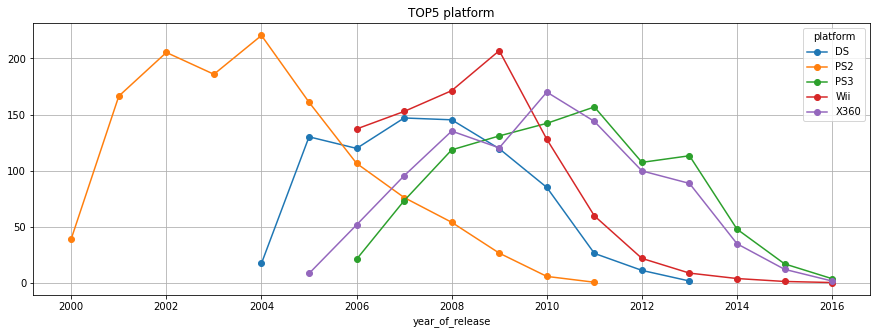

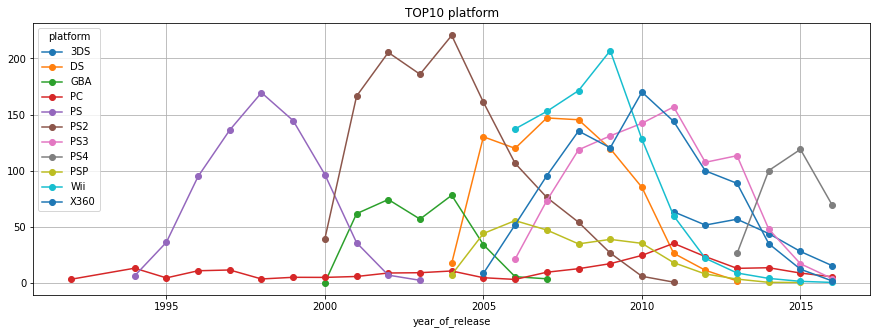

In [21]:
# построим распределение по годам для топовых платформ
df.query('platform == ["PS2", "PS3", "Wii", "X360", "DS"] and year_of_release > 1995').\
pivot_table(index = 'year_of_release', values = 'global_sales', columns = 'platform', aggfunc = 'sum').\
plot(grid=True, style = 'o-', title = 'TOP5 platform',  figsize=(15, 5))
df.query('platform == ["PS", "PS2", "PS3", "PS4", "Wii", "X360", "DS", "GBA", "PSP", "3DS", "PC"] and year_of_release > 1990').\
pivot_table(index = 'year_of_release', values = 'global_sales', columns = 'platform', aggfunc = 'sum').\
plot(grid=True, style = 'o-', title = 'TOP10 platform',  figsize=(15, 5))

In [22]:
# платформы живут около 10 лет
# возьмём более актуальные данные за последние с 5 лет с 2011 года
df_2011 = df.query('year_of_release > 2011')
df.query('year_of_release > 2011 and name == "Grand Theft Auto V"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
16,Grand Theft Auto V,PS3,2013.000,Action,7.020,9.090,0.980,3.960,97.000,8.200,M,21.050
23,Grand Theft Auto V,X360,2013.000,Action,9.660,5.140,0.060,1.410,97.000,8.100,M,16.270
42,Grand Theft Auto V,PS4,2014.000,Action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620
165,Grand Theft Auto V,XOne,2014.000,Action,2.810,2.190,0.000,0.470,97.000,7.900,M,5.470
1730,Grand Theft Auto V,PC,2015.000,Action,0.390,0.690,0.000,0.090,96.000,7.900,M,1.170


In [23]:
# Построим ящики для топ5 игр 
df_2011.query(
    'name == ["Grand Theft Auto V", "Call of Duty: Black Ops II", "Call of Duty: Ghosts",\
    "Call of Duty: Ghosts", "Call of Duty: Black Ops 3", "Minecraft"]'
).pivot_table(columns='name', values='global_sales').iplot(kind='box', yTitle='global_sales', title='Game from 2011')

In [24]:
# разбивка продаж по платформам
df_2011.pivot(columns='platform', values='global_sales').\
iplot(kind='box', yTitle='global_sales', title='Platform from 2011', orientation='h')

In [25]:
# топ10 по играм
df_2011.pivot_table(index = ['platform', 'name'], values = 'global_sales', aggfunc = ['median', 'mean', 'sum', 'count']).\
sort_values(by = ('mean', 'global_sales'), ascending = False, axis = 0).head(10)

,,median,mean,sum,count
,,global_sales,global_sales,global_sales,global_sales
platform,name,,,,
PS3,Grand Theft Auto V,21.050,21.050,21.050,1
X360,Grand Theft Auto V,16.270,16.270,16.270,1
PS4,Call of Duty: Black Ops 3,14.630,14.630,14.630,1
3DS,Pokemon X/Pokemon Y,14.600,14.600,14.600,1
PS3,Call of Duty: Black Ops II,13.790,13.790,13.790,1
X360,Call of Duty: Black Ops II,13.680,13.680,13.680,1
PS4,Grand Theft Auto V,12.620,12.620,12.620,1
3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.680,11.680,11.680,1


In [26]:
# топ10 по платформам
df_2011.pivot_table(index = 'platform', values = 'global_sales', aggfunc = ['median', 'mean', 'count', 'sum']).\
sort_values(by = ('mean', 'global_sales'), ascending = False).head(10)

,median,mean,count,sum
,global_sales,global_sales,global_sales,global_sales
platform,,,,
X360,0.310,0.810,292,236.540
PS4,0.200,0.801,392,314.140
Wii,0.180,0.655,54,35.370
XOne,0.220,0.645,247,159.320
PS3,0.200,0.586,493,288.790
WiiU,0.220,0.559,147,82.190
3DS,0.110,0.491,396,194.610
DS,0.050,0.405,31,12.550


,critic_score,global_sales,user_score
critic_score,1.000,-0.099,-0.522
global_sales,-0.099,1.000,-0.289
user_score,-0.522,-0.289,1.000


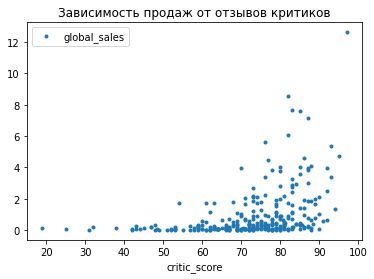

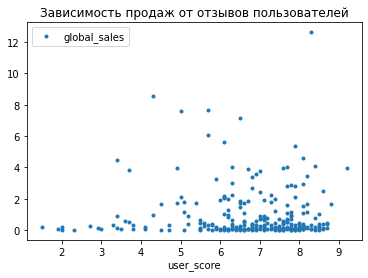

In [27]:
# не удивительно, что показатели среднего и медианы по продажам сильно отличаются у игр и плафторм
# игры выстреливают редко, но метко - с крупной прибылью. Количество выпускаемых игр всегда велико, что сильно искажает среднее
# построим диаграмму рассеивания и поссчитаем корреляцию между отзывыми и продажми для одной из самых популярных плафторм
df_2011.query('platform == "PS4"').\
plot(x='critic_score', y='global_sales', style='.', title='Зависимость продаж от отзывов критиков')
df_2011.query('platform == "PS4" and user_score <= 10').\
plot(x='user_score', y='global_sales', style='.', title='Зависимость продаж от отзывов пользователей')

# корреляцию по одной платформе не проверишь (слишком мало данных). Проверим по всем платформам от 2011 года
df_2011.query('user_score <= 10').\
pivot_table(index = 'platform', values = ['user_score', 'critic_score', 'global_sales']).corr()

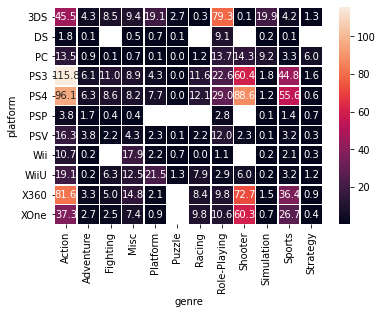

In [28]:
# как по графикам рассеивания, так и по корреляции Пирсона видно, что оценки критиков и юзеров по отношению к общим продажам
# имеют слабую обратную зависимости (< 0.3) и слабо влияют друг на друга в совеременном поколении игр
# самые прибыльные игры это GTA 5 и игры серии CoD, как эксклюзивы они выходили в начале именно на портативные плафтофрмы 
# не подверженные пиратству 
# на "ручные" платформы типа PSV, самые продаваемые игры менее подвижых жанров, такие как Pokemon и SuperMario
# взглянем на игры на платформы по по жанрам

platform_genre_sales = df_2011.pivot_table(index='platform', columns='genre', values='global_sales', aggfunc = 'sum')
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [29]:
# самые продаваемые жанры это Action, Shooter, а также не много RPG и Sports

**Шаг 4. Составление портрета пользователя каждого региона**

In [30]:
# создадим таблицу с продажами платформ по регионам и оценим долю продаж топ5 платформ
# sales_df = df_2011.groupby(['platform']).agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'})
sales_df = df_2011.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').reset_index()
px.pie(sales_df.sort_values(by = 'na_sales', ascending = False).head(5), 
       names = 'platform', values = 'na_sales', title='ТОП5 платформ по продажам в США')

In [31]:
px.pie(sales_df.sort_values(by = 'na_sales', ascending = False).head(5), 
       names = 'platform', values = 'eu_sales', title='ТОП5 платформ по продажам в Европе')

In [32]:
px.pie(sales_df.sort_values(by = 'na_sales', ascending = False).head(5),
       names = 'platform', values = 'jp_sales', title='ТОП5 платформ по продажам в Японии')

In [33]:
# в США и Европе больше всего продается родной XBOX от Microsoft, новое поколение консолей уже конкурирует со старым
# при этом все остальные платформы примерно одинаковы по потребительской популярности
# в Японии видно резкое преобладование народных производителей SONY и Nintendo. 
# Во все самые популярные игры играют именно на 3DS и PS кажется, что на долю продаж также накладывается культура по жанрам
# Рассмотрим ТОП5 продаж по жанрам для каждого региона 
genre_df = df_2011.pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum').reset_index()
px.pie(genre_df.sort_values(by = 'na_sales', ascending = False).head(5), 
       names = 'genre', values = 'na_sales', title='ТОП5 жанров по продажам в США')

In [34]:
px.pie(genre_df.sort_values(by = 'eu_sales', ascending = False).head(5), 
       names = 'genre', values = 'eu_sales', title='ТОП5 жанров по продажам в Eвропе')

In [35]:
px.pie(genre_df.sort_values(by = 'jp_sales', ascending = False).head(5), 
       names = 'genre', values = 'jp_sales', title='ТОП5 жанров по продажам в Японии')

,eu_sales,jp_sales,na_sales
rating,,,
E,113.030,28.330,114.370
E10+,55.370,8.190,75.700
M,194.210,21.200,231.630
T,52.960,26.020,66.020


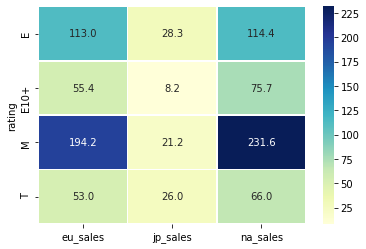

In [36]:
# Популярность жанров действительно отличаются в каждой культуре. Западная культура (Европа и США)
# весьма похожа по потребительским свойствам. В Японии любят больше RPG и чуть больше Action,чем "Запад".
# На спортивные игры по последним тенденциям вообще спроса нет. 
# Но как влияет при этом возрастной рейтинг ESRB?  
ESRB_df = df_2011.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB_df_sales = df_2011.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
sns.heatmap(ESRB_df_sales, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")
ESRB_df

Ремарка:

- «E» («Everyone») — «Для всех»
- E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «M» («Mature») — «Для взрослых»
- «T» («Teen») — «Подросткам»

В обеих западных культурах картинка схожая и зависит больше объема продаваемых игр, также как и с Японией, но больше в пользу E игр

**Шаг 5. Проверка гипотез**

In [38]:
# проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"
df_user_score = df.query('user_score <= 10')
user_score_XOne = df_user_score[df_user_score['platform'] == "XOne"]['user_score']
user_score_PC = df_user_score[df_user_score['platform'] == "PC"]['user_score']
# Пускай нулевая гипотеза (H0) это средняя рейтинги равны, а альтернативная (H1) - то что они различаются.
# используем критерий Стюдента о равенстве средних st.ttest_ind
alpha = 0.05 
# проведем тест и посчитаем p-значение
results =  st.ttest_ind(
    user_score_XOne,
    user_score_PC)

print('p-значение платформ XOne vs PC:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение платформ XOne vs PC: 1.212685740777407e-05
Отвергаем нулевую гипотезу


In [39]:
# проверим гипотезу "Средние пользовательские рейтинги жанров Action и Sports разные"
df_user_score = df.query('user_score <= 10')
user_score_Action = df_user_score[df_user_score['genre'] == "Action"]['user_score']
user_score_Sports = df_user_score[df_user_score['genre'] == "Sports"]['user_score']
# Пускай нулевая гипотеза (H0) это средняя рейтинги равны, а альтернативная (H1) - то что они различаются.
# используем критерий Стюдента о равенстве средних st.ttest_ind
alpha = 0.05 
# проведем тест и посчитаем p-значение
results =  st.ttest_ind(
    user_score_Action,
    user_score_Sports)

print('p-значение жанров Action vs Sports:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение жанров Action vs Sports: 0.08448041959282035
Не получилось отвергнуть нулевую гипотезу


**Шаг 6. Общий вывод**
1. Проверено количество и прибыль игр, выпускаемых в разные годы. Данные за все периоды не так важны, как всплеск спроса на видеоигры с 1995 по 2009, далее не менее важный спад... Что могло к нему привести? Последствия кризиса 2008 или перенасыщение рынка / стабилизация рынка / некорректные данные из датасета ?
2. Рассмотрено распределение по годам для топовых платформ (ТОП5, ТОП10). Выявлено, что платформы "живут" около 10 лет. Определен актуальный период за последние с 5 лет датасета с 2011 года для дальнейшего анализа.
3. Проведен анализ продаж по топовым платформам и играм. Если сравнивать среднее прибыли игры и платформ, то не удивительно, что показатели среднего и медианы по продажам сильно отличаются у игр и платформ игры выстреливают редко, но метко - с весьма крупной прибылью. Количество выпускаемых игр всегда велико, что сильно искажает среднее.
4. Построена диаграмма рассеивания (PS4) и подсчитана корреляция (для всех платформ) между отзывами. Как по графикам рассеивания, так и по корреляции Пирсона видно, что оценки критиков и юзеров по отношению к общим продажам имеют слабую обратную зависимости (< 0.3) и слабо влияют друг на друга в современном поколении игр самые прибыльные игры это GTA 5 и игры серии CoD, как эксклюзивы они выходили в начале именно на портативные платформы не подверженные пиратству. У "ручных" платформ типа PSV, самые продаваемые игры менее подвижных жанров, такие как Pokemon и SuperMario. 
5. Самые продаваемые жанры это Action, Shooter, а также не много RPG и Sports
6. Проведен анализ продаж платформ по регионам и оценка доли продаж (топ5 платформ). В США и Европе больше всего продается родной XBOX от Microsoft, новое поколение консолей уже конкурирует со старым при этом все остальные платформы примерно одинаковы по потребительской популярности в Японии видно резкое преобладание народных производителей SONY и Nintendo. Во все самые популярные игры играют именно на 3DS и PS, кажется, что на долю продаж также накладывается культура по жанрам.
7. Рассмотрено ТОП5 продаж по жанрам для каждого региона. Популярность жанров действительно отличаются в каждой культуре. Западная культура (Европа и США) весьма похожа по потребительским вкусам. В Японии любят больше RPG и чуть больше Action, чем "Запад". На спортивные игры в Японии по последним тенденциям вообще спроса нет.  
8. Исследовано, как влияет при этом возрастной рейтинг ESRB. В обеих западных культурах картинка схожая, игры для взрослых в топе, и зависит больше объема продаваемых игр, также как и с Японией, но больше в пользу E игр.   
9. Проведена проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Нулевая гипотеза о равенстве отвергнута. Выборки и вправду весьма далеки, т.к. на PC выпускается гораздо меньше эксклюзивов.
10. Проведена проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные". По результатам, не получилось отвергнуть нулевую гипотезу.